# Gridsearch CV

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso
from sklearn.svm import SVR

In [3]:
cd ..

/home/jovyan/Modeling


In [4]:
run src/load_data.py

In [5]:
from sklearn.model_selection import train_test_split
X = housing_df.drop('SalePrice', axis=1)
y = housing_df['SalePrice']

In [6]:
np.random.seed(42)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit, StratifiedShuffleSplit

## CV with Ridge

In [10]:
ridge_params = {
    'alpha':np.logspace(0,10,10),
    'normalize':['l2','l1']
}

In [11]:
ridge_gs = GridSearchCV(Ridge(),param_grid=ridge_params, cv=10)


In [12]:
ridge_gs.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e+00,   1.29155e+01,   1.66810e+02,   2.15443e+03,
         2.78256e+04,   3.59381e+05,   4.64159e+06,   5.99484e+07,
         7.74264e+08,   1.00000e+10]), 'normalize': ['l2', 'l1']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [13]:
ridge_gs.score(X_train, y_train), ridge_gs.score(X_test, y_test)

(0.90419681169747246, 0.90007173824267561)

In [14]:
ridge_cv_results = pd.DataFrame(ridge_gs.cv_results_)
ridge_cv_results.head()

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:1

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,param_normalize,params,rank_test_score,split0_test_score,split0_train_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.014532,0.000686,0.808854,0.907623,1,l2,"{'alpha': 1.0, 'normalize': 'l2'}",1,0.306355,0.926246,...,0.851378,0.905051,0.869156,0.906340,0.923472,0.903629,0.000953,0.000049,0.172479,0.006673
1,0.014045,0.000656,0.808854,0.907623,1,l1,"{'alpha': 1.0, 'normalize': 'l1'}",1,0.306355,0.926246,...,0.851378,0.905051,0.869156,0.906340,0.923472,0.903629,0.000093,0.000005,0.172479,0.006673
2,0.014125,0.000677,0.644952,0.664301,12.9155,l2,"{'alpha': 12.9154966501, 'normalize': 'l2'}",3,0.544250,0.687095,...,0.594151,0.663982,0.677480,0.659748,0.768594,0.656306,0.000196,0.000047,0.075397,0.008474
3,0.014020,0.000663,0.644952,0.664301,12.9155,l1,"{'alpha': 12.9154966501, 'normalize': 'l1'}",3,0.544250,0.687095,...,0.594151,0.663982,0.677480,0.659748,0.768594,0.656306,0.000115,0.000012,0.075397,0.008474
4,0.014081,0.000657,0.142972,0.149411,166.81,l2,"{'alpha': 166.81005372, 'normalize': 'l2'}",5,0.143709,0.153180,...,0.126216,0.149808,0.144010,0.148111,0.171127,0.146590,0.000325,0.000015,0.018639,0.002391


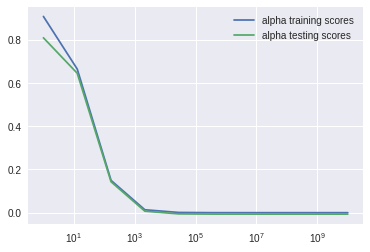

In [15]:
plt.plot(ridge_cv_results.param_alpha, ridge_cv_results.mean_train_score, label='alpha training scores')
plt.plot(ridge_cv_results.param_alpha, ridge_cv_results.mean_test_score, label='alpha testing scores')
plt.xscale('log')
plt.legend()

In [16]:
ridge_gs.best_params_

{'alpha': 1.0, 'normalize': 'l2'}

## CV with Lasso

In [17]:
lasso_params = {
    'alpha':np.logspace(0,20,10)
}

In [18]:
lasso_gs = GridSearchCV(Lasso(), param_grid= lasso_params, cv=10)

In [19]:
lasso_gs.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e+00,   1.66810e+02,   2.78256e+04,   4.64159e+06,
         7.74264e+08,   1.29155e+11,   2.15443e+13,   3.59381e+15,
         5.99484e+17,   1.00000e+20])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [20]:
lasso_gs.score(X_train, y_train), lasso_gs.score(X_test, y_test)

(0.91520048272023247, 0.91739824865495301)

In [21]:
lasso_cv_results = pd.DataFrame(lasso_gs.cv_results_)
lasso_cv_results.head()

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:1

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.248305,0.001027,0.737745,0.949406,1,{'alpha': 1.0},2,-0.205306,0.955908,0.877266,...,0.889644,0.947554,0.797251,0.947890,0.862920,0.946283,0.017090,0.000055,0.325295,0.004640
1,0.052920,0.000633,0.778523,0.919298,166.81,{'alpha': 166.81005372},1,-0.184363,0.935407,0.898603,...,0.885035,0.918273,0.913308,0.916979,0.942445,0.915132,0.011986,0.000038,0.323954,0.006433
2,0.060829,0.000680,0.649566,0.732599,27825.6,{'alpha': 27825.5940221},3,-0.418744,0.816572,0.840485,...,0.753755,0.723807,0.792836,0.719656,0.797738,0.722044,0.013143,0.000036,0.360458,0.028410
3,0.006148,0.000584,0.538608,0.579326,4.64159e+06,{'alpha': 4641588.83361},4,-0.174710,0.681879,0.662219,...,0.613977,0.564789,0.590254,0.571983,0.619028,0.572185,0.000054,0.000018,0.242764,0.034733
4,0.004874,0.000629,-0.006614,0.000000,7.74264e+08,{'alpha': 774263682.681},5,-0.000497,0.000000,-0.004015,...,-0.003363,0.000000,-0.006643,0.000000,-0.014381,0.000000,0.000062,0.000160,0.004375,0.000000


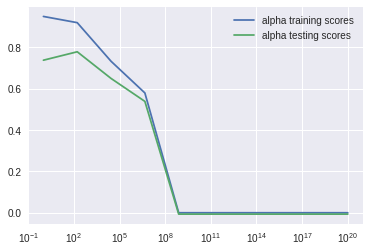

In [22]:
plt.plot(lasso_cv_results.param_alpha, lasso_cv_results.mean_train_score, label='alpha training scores')
plt.plot(lasso_cv_results.param_alpha, lasso_cv_results.mean_test_score, label='alpha testing scores')
plt.xscale('log')
plt.legend()

In [23]:
lasso_gs.best_params_

{'alpha': 166.81005372000593}

By tuning the alpha parameter we were able to improve the scroe on the test data set from 0.86 to 0.91. Adding normalization L1 or L2 did not have a positive impact on the score and we reverted back to the default of no normalization. The best alpha parameter for the model is 166.81.

## CV with SVR

In [24]:
X = numeric_log_sc_df.drop('SalePrice', axis=1)
y = numeric_log_sc_df['SalePrice']

In [25]:
np.random.seed(42)

In [26]:
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(X,y)

In [27]:
svr_params = {
    'C': np.logspace(-3,3,5)
}

In [28]:
svr_gs = GridSearchCV(SVR(), param_grid= svr_params, cv=10)

In [29]:
svr_gs.fit(X_train_sc, y_train_sc)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-03,   3.16228e-02,   1.00000e+00,   3.16228e+01,
         1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [30]:
svr_gs.score(X_train_sc, y_train_sc), svr_gs.score(X_test_sc, y_test_sc)

(0.99280248435147178, 0.82497448525405137)

In [31]:
svr_cv_results = pd.DataFrame(svr_gs.cv_results_)
svr_cv_results.head()

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:1

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.424763,0.044977,-0.029047,-0.024797,0.001,{'C': 0.001},5,-0.021286,-0.024881,0.000371,...,-0.043509,-0.024570,-0.066268,-0.023538,0.016854,-0.025984,0.019352,0.000330,0.032912,0.001139
1,0.360343,0.038693,0.341665,0.354017,0.0316228,{'C': 0.0316227766017},4,0.293256,0.360772,0.364902,...,0.307013,0.358725,0.302686,0.354691,0.521178,0.335712,0.003087,0.000423,0.097930,0.012458
2,0.313700,0.032479,0.731857,0.884530,1,{'C': 1.0},3,0.719947,0.880320,0.760044,...,0.725108,0.878567,0.787537,0.877452,0.869751,0.878278,0.003925,0.000555,0.136027,0.012617
3,0.323937,0.033180,0.743407,0.992734,31.6228,{'C': 31.6227766017},1,0.745541,0.992758,0.776681,...,0.745276,0.992475,0.816307,0.992664,0.851609,0.992951,0.005356,0.000532,0.126548,0.000131
4,0.325010,0.033147,0.743407,0.992734,1000,{'C': 1000.0},1,0.745541,0.992758,0.776681,...,0.745276,0.992475,0.816307,0.992664,0.851609,0.992951,0.004979,0.000636,0.126548,0.000131


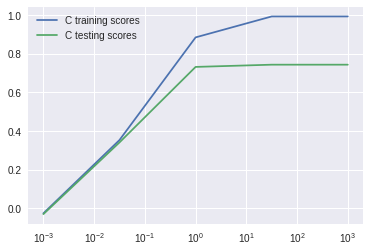

In [32]:
plt.plot(svr_cv_results.param_C, svr_cv_results.mean_train_score, label='C training scores')
plt.plot(svr_cv_results.param_C, svr_cv_results.mean_test_score, label='C testing scores')
plt.xscale('log')
plt.legend()

In [33]:
svr_gs.best_params_

{'C': 31.622776601683793}

By tuning the C value we were able to improve the score on the test data set slightly from 0.81659613910776607 to 0.82497448525405137. The best C paramter for the model is 31.62.